# **UAS PSD**

Repository : https://github.com/teguhbudiprasetya/heart-disease-streamlit/tree/master

Streamlit  : https://teguhprasetya-heart-disease-app-deploy.streamlit.app/

# Tujuan

Dataset yang mendeskripsikan diagnosa penyakit jantung. Dalam konteks ini, dataset yang terdiri dari 13 fitur, kombinasi fitur nominal dan numerik, serta memiliki kelas-kelas yang mengindikasikan kemungkinan seseorang menderita penyakit jantung.

Penyakit jantung merupakan salah satu penyakit yang paling umum dan sering kali fatal di seluruh dunia. Dengan memiliki dataset yang memuat informasi mengenai diagnosa penyakit jantung, kita dapat melakukan analisis lebih lanjut untuk prediksi awal dan pencegahan:

1. Prediksi: Data ini memungkinkan pembangunan model machine learning yang dapat memprediksi kemungkinan seseorang menderita penyakit jantung. Dengan menggunakan algoritma klasifikasi, model dapat dibuat untuk mengidentifikasi pola-pola dalam data yang mengindikasikan risiko seseorang terkena penyakit jantung.

2. Evaluasi: Mencoba berbagai model machine learning, implementasi penyeimbangan data, dan ekstraksi fitur dengan dataset ini.



# Data Understanding

https://archive.ics.uci.edu/dataset/45/heart+disease


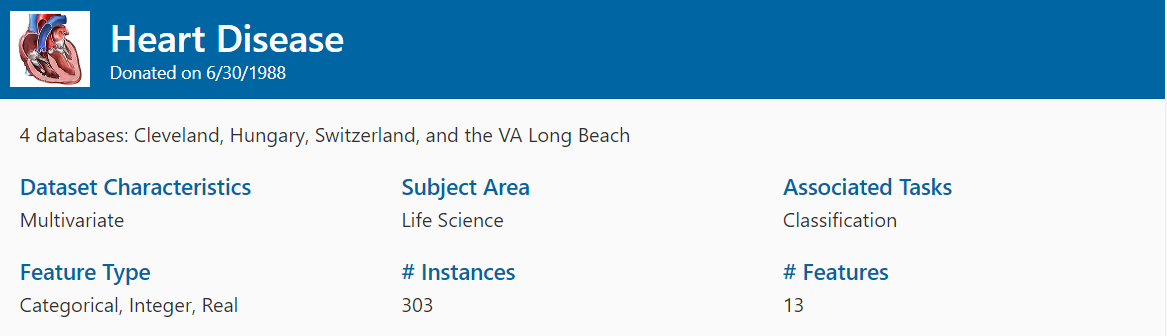

1.   age: Umur dalam tahun

2.   sex: jenis kelamin

>
        -- Value 1: Pria
        -- Value 0: wanita
        
3.   cp: chest pain type (tipe penyakit dada)

>
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
        
4.   trestbps: tekanan darah (dalam mm Hg)

5.   chol: kolestrol (dalam mg/dl)

6.   fbs: (gula darah > 120 mg/dl)

>
        -- Value 1: true
        -- Value 0: false
        
7.   restecg: hasil kondisi ECG pasien saat sedang istirahat

>
        -- Value 0: normal
        -- Value 1: adanya gelombang abnormal
        -- Value 2: adanya pembesaran ventrikel kiri
        
8.   thalach: detak jantung maksimal yang diraih permenit

9.   exang: nyeri dada setelah berolahraga

>
        -- Value 0: no
        -- Value 1: yes
        
10.  oldpeak:  penurunan segment ST pada elektrokardiogram (EKG) yang terjadi selama tes latihan fisik

11.  slope: tkemiringan segmen ST selama uji latihan fisik pada elektrokardiogram (EKG)

>
        -- Value 1: upsloping / Kemiringan Naik
        -- Value 2: flat /  Datar
        -- Value 3: downsloping / Kemiringan Turun

12.  ca: jumlah pembuluh darah utama yang ditemukan dalam gambaran angiografi koroner yang diwarnai dengan fluoroskopi (0-3)

13. thal: stress test atau tes latihan stres thallium, mengevaluasi aliran darah ke otot jantung selama latihan fisik dan pada istirahat

>
        -- Value 3: Normal
        -- Value 6: Fixed Defect
        -- Value 7: Reversable defect

14. num: diagnosis penyakit jantung
        

>
        -- Value 0: Tidak ada penyakit jantung
        -- Value 1: Penyakit jantung ringan
        -- Value 2: Penyakit jantung sedang
        -- Value 3: Penyakit jantung signifikan
        -- Value 4: Penyakit jantung parah


In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
heart_disease = fetch_ucirepo(id=45)

X = heart_disease.data.features
y = heart_disease.data.targets

print(heart_disease.variables)


        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

Ditemukan adanya fitur dengan tipe numerik, maka diperlukan adanya normalisasi. Serta pada fitur tipe data categorical sudah bernilai integer, maka tidak diperlukan hot encoding.

## Identifikasi missing values

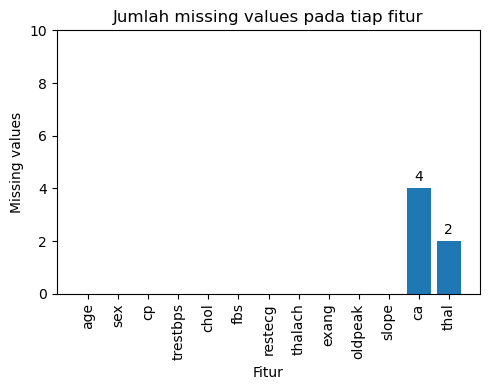

In [ ]:
nama_fitur = X.columns
missing_fitur = [X[i].isnull().sum() for i in X.columns]

fig, ax = plt.subplots(figsize=(5,4))
bars = ax.bar(nama_fitur, missing_fitur)
plt.xlabel('Fitur')
plt.ylabel('Missing values')
plt.title('Jumlah missing values pada tiap fitur')

for bar, accuracy in zip(bars, missing_fitur):
    height = bar.get_height()
    if accuracy > 0:
        ax.annotate(f'{accuracy}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                textcoords="offset points", ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=90)
plt.ylim(0.0, 10)
plt.tight_layout()
plt.show()

Ditemukan adanya missing values, diperlukan imputasi pada missing values tersebut.

## Identifikasi keseimbangan kelas

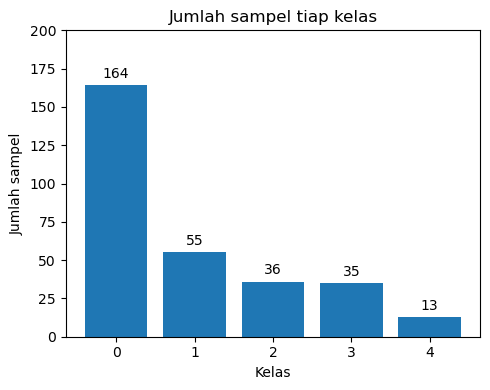

In [ ]:
fig, ax = plt.subplots(figsize=(5,4))
bars = ax.bar(range(len(y.value_counts())), y.value_counts().values)
plt.xlabel('Kelas')
plt.ylabel('Jumlah sampel')
plt.title('Jumlah sampel tiap kelas')

for bar, accuracy in zip(bars, y.value_counts().values):
    height = bar.get_height()
    if accuracy > 0:
        ax.annotate(f'{accuracy}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                textcoords="offset points", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.ylim(0.0, 200)
plt.show()



Ditemukan bahwa porsi sampel pada tiap kelas sangat tidak seimbang, untuk memenuhi eksplorasi/eksperimen pada dataset ini.

Maka, diputuskan bahwa eksplorasi akan dibagai menjadi dua skenario. Yaitu evaluasi perbandingan performa model dengan dataset seimbang dan tidak seimbang.

## Identifikasi duplikasi data

In [ ]:
X.duplicated().sum()

0

Tidak ditemukan adanya duplikasi data pada dataset.

## Kesimpulan pada fase Data Understanding

* Normalisasi pada dataset, sebab terdapat fitur bersifat numerik.

* Imputasi missing values

* Dataset sangat tidak seimbang, diperlukan adanya penyeimbangan data.

* Tidak ditemukan adanya duplikasi data

# Data Preprocessing

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pickle

## Imputasi missing values berdasarkan modus

Mengisi missing values dengan nilai yang paling sering muncul pada fitur atau kolomnya.

$$
 X_{\text{i}} = \begin{cases} \text{modus}(X) & \text{jika nilai} \ X_{\text{i}} \ \text{adalah missing value} \\ X_{\text{i}} & \text{jika nilai} \ X_{\text{i}} \ \text{sudah ada} \end{cases}
$$

* $X$ adalah himpunan (fitur)

* $\text{modus}$  adalah nilai yang paling sering muncul dalam suatu himpunan.

* $\text{modus}(X)$ adalah nilai modus dari himpunan X.



In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
imputed_data = imputer.fit_transform(X)

imputed_df = pd.DataFrame(imputed_data, columns=X.columns)


In [ ]:
imputed_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0


In [ ]:
imputed_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

Sudah tidak ada lagi missing values pada dataset.

## Normalizing
Normalisasi berfungsi untuk menyamaratakan atau menyeimbangkan nilai agar selaras.

### MinMax


MinMax normalization digunakan untuk mengubah nilai-nilai dalam suatu dataset agar berada dalam rentang tertentu, umumnya dari 0 hingga 1. Ini berguna untuk menyamakan skala antar fitur.

Ini adalah rumus min-max normalization:

$$
x_{\text{norm}} = \frac{x - \text{min}(X)}{\text{max}(X) - \text{min}(X)}
$$

* $x_{\text{norm}}$ adalah nilai yang telah dinormalisasi.

* $x$ adalah nilai asli yang ingin dinormalisasi.

* $min(X)$ adalah nilai minimum dari seluruh data pada fitur dataset.

* $max(X)$ adalah nilai maksimum dari seluruh pada fitur dataset.


In [ ]:
scaler = MinMaxScaler()

scaler_mmax = scaler.fit(imputed_df)

with open('scaler_mmax.pkl', 'wb') as f:
    pickle.dump(scaler_mmax, f)


scaled_data = scaler_mmax.transform(imputed_df)

scaled_df = pd.DataFrame(scaled_data, columns=imputed_df.columns)


scaled_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,0.000000,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0.75
1,0.791667,1.0,1.000000,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,0.00
2,0.791667,1.0,1.000000,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,1.00
3,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.00
4,0.250000,0.0,0.333333,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.333333,1.0,0.000000,0.150943,0.315068,0.0,0.0,0.465649,0.0,0.193548,0.5,0.000000,1.00
299,0.812500,1.0,1.000000,0.471698,0.152968,1.0,0.0,0.534351,0.0,0.548387,0.5,0.666667,1.00
300,0.583333,1.0,1.000000,0.339623,0.011416,0.0,0.0,0.335878,1.0,0.193548,0.5,0.333333,1.00
301,0.583333,0.0,0.333333,0.339623,0.251142,0.0,1.0,0.786260,0.0,0.000000,0.5,0.333333,0.00


## Menyeimbangkan data dengan SMOTE

Rumus dasar untuk menghasilkan sampel sintetis menggunakan SMOTE dapat dijelaskan sebagai berikut:

Misalkan $X$ adalah kelas minoritas yang ingin di-oversampling, dan $x_i$ adalah satu data dalam kelas $X$.

1. Hitung $k$-nearest neighbors (tetangga terdekat) dari $x_i$ dalam kelas minoritas $X$. Ini akan menghasilkan sejumlah tetangga terdekat dari $x_i$.

2. Pilih satu atau beberapa tetangga terdekat $x_{nn}$ dari $x_i$.

3. Untuk setiap tetangga terdekat $x_{nn}$, hitung perbedaan antara $x_i$ dan $x_{nn}$ (biasanya menggunakan perbedaan vektor antara $x_i$ dan $x_{nn}$).

4. Kalikan perbedaan ini dengan bilangan acak antara 0 dan 1.

5. Tambahkan hasil perkalian ini ke $x_i$ untuk membuat sampel sintetis baru.

Rumus matematisnya dapat dijelaskan sebagai berikut:

Jika $x_i$ adalah satu data dalam kelas minoritas dan $x_{nn}$ adalah tetangga terdekatnya dalam kelas minoritas, maka sampel sintetis $x_{new}$ dapat dihitung sebagai berikut:

$$
x_{new} = x_i + (\text{bilangan acak} \times (x_i - x_{nn})
$$

Di sini, $\text{bilangan acak}$ adalah bilangan acak antara 0 dan 1 yang digunakan untuk mengatur seberapa jauh sampel sintetis dibuat dari $x_i$ dalam arah menuju $x_{nn}$.


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = smote.fit_resample(scaled_df, y)

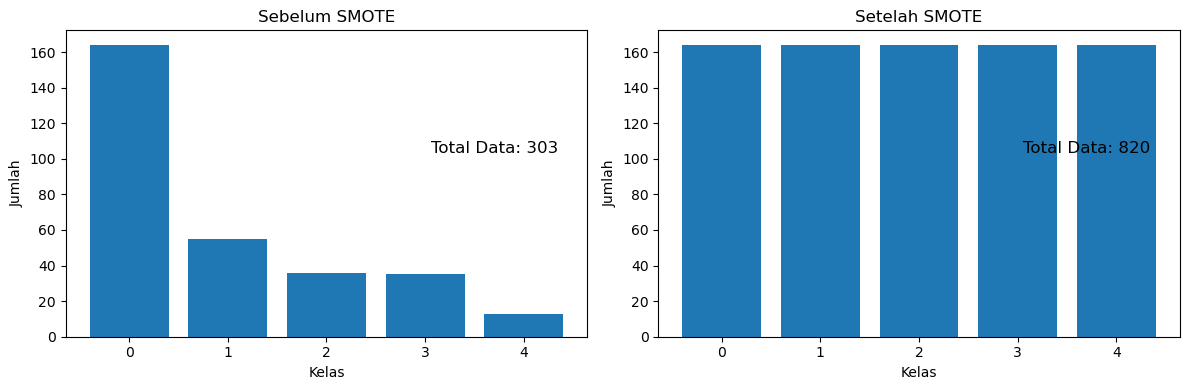

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.bar(range(len(y.value_counts())), y.value_counts().values)
ax1.set_xlabel('Kelas')
ax1.set_ylabel('Jumlah')
ax1.set_title('Sebelum SMOTE')

ax2.bar(range(len(y_resampled.value_counts())), y_resampled.value_counts().values)
ax2.set_xlabel('Kelas')
ax2.set_ylabel('Jumlah')
ax2.set_title('Setelah SMOTE')

total_data_before = y.shape[0]
total_data_after = y_resampled.shape[0]
ax1.annotate(f"Total Data: {total_data_before}", xy=(0.7, 0.6), xycoords='axes fraction', fontsize=12)
ax2.annotate(f"Total Data: {total_data_after}", xy=(0.7, 0.6), xycoords='axes fraction', fontsize=12)

plt.tight_layout()
plt.show()



## Splitting data
Membagai data training dan testing sebesar 80% dan 20%

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2, random_state=42)

## Splitting data imbang
Membagi data baru hasil SMOTE menjadi data training dan testing sebesar 80% dan 20%

In [ ]:
x_train_resampled, x_test_resampled, y_train_resampled, y_test_resampled = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

# Modeling
Modeling akan mengimplementasikan 6 model untuk membandingkan model dengan performa terbaik

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

compare_result = {}

## Random Forest

Rumus untuk prediksi dalam Random Forest adalah:

$$
\hat{Y} = \frac{1}{N} \sum_{i=1}^{N} f_i(X)
$$

Dalam rumus ini:

- $\hat{Y}$ adalah prediksi dari Random Forest untuk suatu data input $X$.

- $N$ adalah jumlah pohon keputusan dalam Random Forest.

- $f_i(X)$ adalah prediksi yang dihasilkan oleh pohon keputusan ke-\(i\) untuk data input $X$.


In [ ]:
store_acc = []
for i in range(1,101):
  rf = RandomForestClassifier(n_estimators=i, random_state=42)
  rf.fit(x_train, y_train.values.ravel())
  y_pred_rf = rf.predict(x_test)
  acc = accuracy_score(y_test, y_pred_rf)
  # print(f'Estimator = {i}, Akurasi = {acc}')
  store_acc.append(acc)
print(f'Akurasi terbaik terletak pada estimator={store_acc.index(max(store_acc))+1} dengan akurasi= {max(store_acc)}')
compare_result['Random Forest'] = max(store_acc)

Akurasi terbaik terletak pada estimator=4 dengan akurasi= 0.5573770491803278


In [ ]:
# SMOTE

store_acc = []
for i in range(1,101):
  rf_SMOTE = RandomForestClassifier(n_estimators=i, random_state=42)
  rf_SMOTE.fit(x_train_resampled, y_train_resampled.values.ravel())
  y_pred_rf_SMOTE = rf_SMOTE.predict(x_test_resampled)
  accuracy_rf_SMOTE = accuracy_score(y_test_resampled, y_pred_rf_SMOTE)
  store_acc.append(accuracy_rf_SMOTE)
best_estimator = store_acc.index(max(store_acc))+1
print(f'Akurasi terbaik terletak pada estimator={best_estimator} dengan akurasi= {max(store_acc)}')
compare_result['Random Forest - SMOTE'] = max(store_acc)

rf_SMOTE = RandomForestClassifier(n_estimators=best_estimator, random_state=42)
rf_SMOTE.fit(x_train_resampled, y_train_resampled.values.ravel())

with open('random_forest_SMOTE.pkl', 'wb') as f:
    pickle.dump(rf_SMOTE, f)

Akurasi terbaik terletak pada estimator=25 dengan akurasi= 0.8841463414634146


## Neural Network

Rumus umum dalam Neural Network adalah:

$$
z^{[l]} = W^{[l]}a^{[l-1]} + b^{[l]}
$$

$$
a^{[l]} = g^{[l]}(z^{[l]})
$$

Dalam rumus ini:

- $z^{[l]}$ adalah nilai yang dihitung di layer $l$ sebelum fungsi aktivasi.

- $W^{[l]}$ adalah matriks bobot di layer $l$.

- $a^{[l-1]}$ adalah output dari layer sebelumnya $l-1$.

- $b^{[l]}$ adalah vektor bias di layer $l$.

- $a^{[l]}$ adalah output yang dihasilkan oleh fungsi aktivasi $g^{[l]}$ dari $z^{[l]}$.


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(512, 256, 32), max_iter=1000, random_state=42)

mlp.fit(x_train, y_train.values.ravel())
y_pred_mlp = mlp.predict(x_test)

accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("Neural Network Accuracy:", accuracy_mlp)
compare_result['Neural Network'] = accuracy_mlp

Neural Network Accuracy: 0.4262295081967213


In [ ]:
# SMOTE

mlp_SMOTE = MLPClassifier(hidden_layer_sizes=(512, 256, 32), max_iter=1000, random_state=42)

mlp_SMOTE.fit(x_train_resampled, y_train_resampled.values.ravel())
y_pred_mlp_SMOTE = mlp_SMOTE.predict(x_test_resampled)

accuracy_mlp_SMOTE = accuracy_score(y_test_resampled, y_pred_mlp_SMOTE)
print("Neural Network Accuracy:", accuracy_mlp_SMOTE)
compare_result['Neural Network - SMOTE'] = accuracy_mlp_SMOTE

with open('Neural_Network_SMOTE.pkl', 'wb') as f:
    pickle.dump(mlp_SMOTE, f)

Neural Network Accuracy: 0.8414634146341463


## Logistic Regression

Rumus untuk Logistic Regression adalah:

$$
\hat{y} = \sigma(w^T x + b)
$$

Dalam rumus ini:

- $\hat{y}$ adalah nilai prediksi.

- $\sigma$ adalah fungsi sigmoid yang mengonversi nilai menjadi rentang antara 0 dan 1.

- $w$ adalah vektor bobot.

- $x$ adalah vektor fitur input.

- $b$ adalah bias.


In [ ]:
logistic_regression = LogisticRegression(random_state=42, max_iter=1000, C=0.1)

logistic_regression.fit(x_train, y_train.values.ravel())

y_pred_lr = logistic_regression.predict(x_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)
compare_result['Logistic Regression'] = accuracy_lr

Logistic Regression Accuracy: 0.5081967213114754


In [ ]:
# SMOTE

logistic_regression_SMOTE = LogisticRegression(random_state=42, max_iter=1000, C=0.1)


logistic_regression_SMOTE.fit(x_train_resampled, y_train_resampled.values.ravel())

y_pred_lr_SMOTE = logistic_regression_SMOTE.predict(x_test_resampled)

accuracy_lr_SMOTE = accuracy_score(y_test_resampled, y_pred_lr_SMOTE)
print("Logistic Regression Accuracy:", accuracy_lr_SMOTE)
compare_result['Logistic Regression - SMOTE'] = accuracy_lr_SMOTE

with open('Logistic_SMOTE.pkl', 'wb') as f:
    pickle.dump(logistic_regression_SMOTE, f)

Logistic Regression Accuracy: 0.5121951219512195


## XGBoost

In [ ]:
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(x_train, y_train.values.ravel())

y_pred_xgb = xgb_classifier.predict(x_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)
compare_result['XGBoost'] = accuracy_xgb

XGBoost Accuracy: 0.4918032786885246


In [ ]:
# SMOTE

xgb_classifier_SMOTE = xgb.XGBClassifier(random_state=42)
xgb_classifier_SMOTE.fit(x_train_resampled, y_train_resampled.values.ravel())

y_pred_xgb_SMOTE = xgb_classifier_SMOTE.predict(x_test_resampled)

accuracy_xgb_SMOTE = accuracy_score(y_test_resampled, y_pred_xgb_SMOTE)
print("XGBoost Accuracy:", accuracy_xgb_SMOTE)
compare_result['XGBoost - SMOTE'] = accuracy_xgb_SMOTE

with open('XGBoost_SMOTE.pkl', 'wb') as f:
    pickle.dump(xgb_classifier_SMOTE, f)

XGBoost Accuracy: 0.8658536585365854


## Naive Bayes

Rumus Bayes untuk Naive Bayes dapat ditulis sebagai:

$$ P(Y | X_1, X_2, \ldots, X_n) = \frac{P(Y) \cdot P(X_1, X_2, \ldots, X_n | Y)}{P(X_1, X_2, \ldots, X_n)} $$

Dalam rumus ini:

- $P(Y | X_1, X_2, \ldots, X_n)$ adalah probabilitas kelas $Y$ diberikan fitur-fitur $X_1, X_2, \ldots, X_n$.

- $P(Y)$ adalah probabilitas prior dari kelas $Y$.

- $P(X_1, X_2, \ldots, X_n | Y)$ adalah probabilitas likelihood dari fitur-fitur tersebut bila dikondisikan terhadap kelas $Y$.

- $P(X_1, X_2, \ldots, X_n)$ adalah probabilitas evidence atau bukti dari fitur-fitur tersebut.



In [ ]:
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train, y_train.values.ravel())

y_pred_nb = nb_classifier.predict(x_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)
compare_result['Naive Bayes'] = accuracy_nb

Naive Bayes Accuracy: 0.5081967213114754


In [ ]:
# SMOTE

nb_classifier_SMOTE = MultinomialNB()
nb_classifier_SMOTE.fit(x_train_resampled, y_train_resampled.values.ravel())

y_pred_nb_SMOTE = nb_classifier_SMOTE.predict(x_test_resampled)

accuracy_nb_SMOTE = accuracy_score(y_test_resampled, y_pred_nb_SMOTE)
print("Naive Bayes Accuracy:", accuracy_nb_SMOTE)
compare_result['Naive Bayes - SMOTE'] = accuracy_nb_SMOTE

with open('Naive_SMOTE.pkl', 'wb') as f:
    pickle.dump(nb_classifier_SMOTE, f)

Naive Bayes Accuracy: 0.4268292682926829


## Support Vector Machine

Rumus yang digunakan dalam SVM adalah:

$$ y = \text{sign}\left(\sum_{i=1}^{n} \alpha_i y_i K(\mathbf{x}_i, \mathbf{x}) + b\right) $$

Dalam rumus ini:

- $y$ adalah label kelas prediksi.

- $\alpha_i$ adalah koefisien Lagrange yang diperoleh selama pelatihan SVM.

- $y_i$ adalah label kelas dari titik data.

- $K(\mathbf{x}_i, \mathbf{x})$ adalah fungsi kernel yang menghitung "kemiripan" antara dua titik data.

- $\mathbf{x}_i$ adalah titik data pada indeks ke-$i$.

- $\mathbf{x}$ adalah titik data yang ingin diprediksi.

- $b$ adalah intersep atau bias.

In [ ]:
svm_classifier = SVC(kernel='linear', random_state=42)

svm_classifier.fit(x_train, y_train.values.ravel())
y_pred_svm = svm_classifier.predict(x_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
compare_result['SVM'] = accuracy_svm

SVM Accuracy: 0.5245901639344263


In [ ]:
# SMOTE

svm_classifier_SMOTE = SVC(kernel='linear', random_state=42)

svm_classifier_SMOTE.fit(x_train_resampled, y_train_resampled.values.ravel())
y_pred_svm_SMOTE = svm_classifier_SMOTE.predict(x_test_resampled)

accuracy_svm_SMOTE = accuracy_score(y_test_resampled, y_pred_svm_SMOTE)
print("SVM Accuracy:", accuracy_svm_SMOTE)
compare_result['SVM - SMOTE'] = accuracy_svm_SMOTE

with open('SVM_SMOTE.pkl', 'wb') as f:
    pickle.dump(svm_classifier_SMOTE, f)

SVM Accuracy: 0.5914634146341463


# Evaluasi

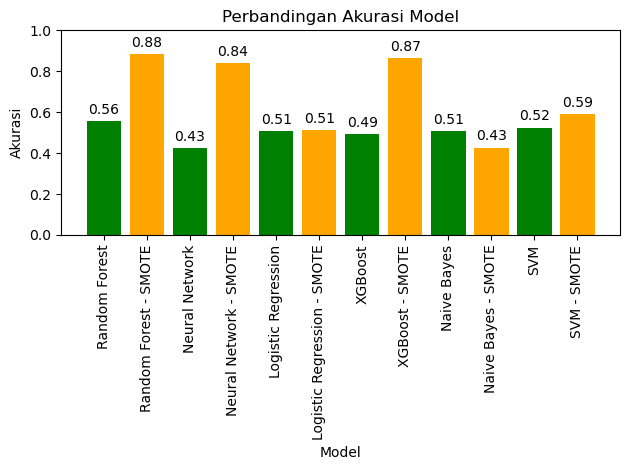

In [ ]:
model_names = list(compare_result.keys())
accuracies = list(compare_result.values())

fig, ax = plt.subplots()
bars = ax.bar(model_names, accuracies, color=['green', 'orange'])
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi Model')

for bar, accuracy in zip(bars, accuracies):
    height = bar.get_height()
    ax.annotate(f'{accuracy:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                textcoords="offset points", ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=90)
plt.tight_layout()
plt.ylim(0,1)
plt.show()

Membandingkan performa seluruh model yang telah dibuat di atas, didapatkan bahwa:

1. Performa model dengan dataset yang tidak imbang tidak cukup baik.

2. Tren performa model meningkat sangat signifikan ketika dataset sudah seimbang.

3. Performa model Naive Bayes justru menurun ketika dataset sudah seimbang.

4. Model Neural Network menjadi model dengan peningkatan paling besar.

## Seleksi Fitur
Seleksi fitur akan menggunakan 3 metode yaitu Information Gain, Chi Squared, dan Anova.

Bertujuan untuk membandingkan metode seleksi fitur terbaik, dan dalam prosesnya, setiap pengimplementasian masing-masing seleksi fitur akan menggunakan 3 model terbaik yaitu Random Forest, XGBoost, dan Neural Network.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2

Fitur yang ingin diseleksi adalah sebanyak 10 dari 13 fitur.

In [ ]:
fs_method = [['Information Gain', mutual_info_classif], ["Chi-squared", chi2], ["ANOVA", f_classif]]
for i in range(3):
  selector = SelectKBest(fs_method[i][1], k=10)
  X_new = selector.fit_transform(x_resampled, y_resampled.values.ravel())

  selected_features_mask = selector.get_support()
  feature_scores = selector.scores_

  feature_names = x_resampled.columns.values.ravel()
  selected_features = [feature_names[i] for i, selected in enumerate(selected_features_mask) if selected]

  fs_method[i].append(selected_features)
  fs_method[i].append(feature_scores)

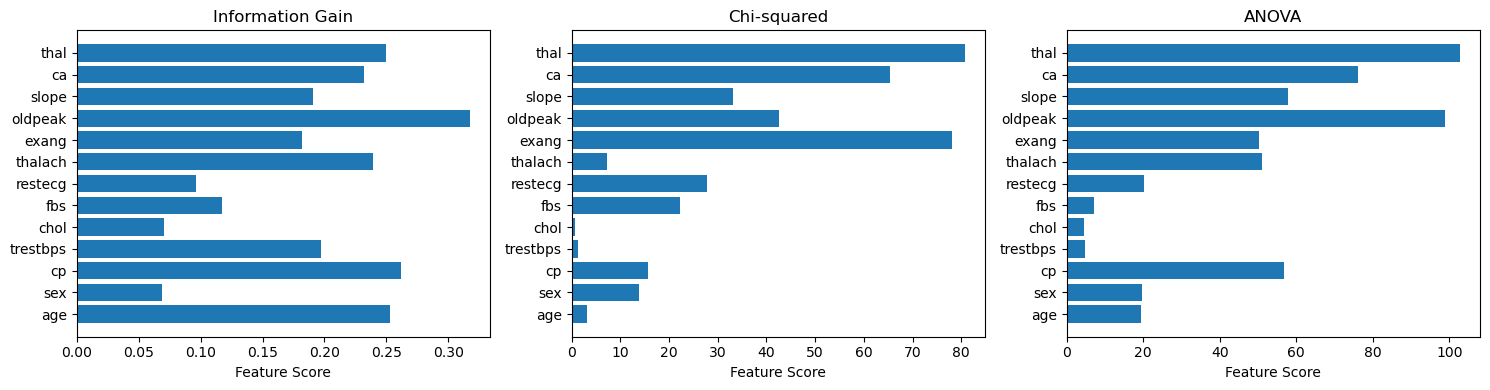

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i in range(3):
    axes[i].barh(range(len(fs_method[i][3])), fs_method[i][3])
    axes[i].set_yticks(range(len(fs_method[i][3])))
    axes[i].set_yticklabels(feature_names)
    axes[i].set_xlabel('Feature Score')
    axes[i].set_title(f'{fs_method[i][0]}')

plt.tight_layout()
plt.show()


### Information Gain

Rumus Information Gain

$$Information Gain(S, A) = Entropy(S) - Σ (|S_v| / |S|) * Entropy(S_v)$$

Dalam rumus ini:

* $Information Gain(S, A)$ adalah information gain dari sebuah fitur $A$ dalam dataset $S$.

* $Entropy(S)$ adalah entropy dari dataset $S$.

* $Values(A)$ adalah nilai-nilai yang mungkin dari fitur $A$.

* $|S|$ adalah jumlah total contoh dalam dataset $S$.

* $|S_v|$ adalah jumlah contoh dalam subset $S_v$ dari dataset $S$ dimana fitur $A$ memiliki nilai $v$.

* $Entropy(S_v)$ adalah entropy dari subset $S_v$ dari dataset $S$.


In [ ]:
df_gain = pd.DataFrame(x_resampled, columns=fs_method[0][2])
df_gain

,age,cp,trestbps,fbs,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,0.000000,0.481132,1.0,0.603053,0.000000,0.370968,1.0,0.000000,0.750000
1,0.791667,1.000000,0.622642,0.0,0.282443,1.000000,0.241935,0.5,1.000000,0.000000
2,0.791667,1.000000,0.245283,0.0,0.442748,1.000000,0.419355,0.5,0.666667,1.000000
3,0.166667,0.666667,0.339623,0.0,0.885496,0.000000,0.564516,1.0,0.000000,0.000000
4,0.250000,0.333333,0.339623,0.0,0.770992,0.000000,0.225806,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
815,0.396753,0.590833,0.468239,0.0,0.680452,1.000000,0.327016,0.5,0.196944,1.000000
816,0.607979,0.676833,0.179307,0.0,0.709874,0.000000,0.400766,0.5,0.343500,0.992375
817,0.546335,1.000000,0.614890,0.0,0.559183,1.000000,0.145899,0.5,0.333333,0.962652
818,0.714383,1.000000,0.456028,0.0,0.465649,0.177399,0.334026,0.5,0.666667,0.794350


In [ ]:
x_train_gain, x_test_gain, y_train_gain, y_test_gain = train_test_split(df_gain, y_resampled, test_size=0.2, random_state=42)

In [ ]:
compare_result_kbest = {}

In [ ]:
store_acc_gain = []
for i in range(1,101):
  rf = RandomForestClassifier(n_estimators=i, random_state=42)
  rf.fit(x_train_gain, y_train_gain.values.ravel())
  y_pred_rf = rf.predict(x_test_gain)
  acc = accuracy_score(y_test_gain, y_pred_rf)
  # print(f'Estimator = {i}, Akurasi = {acc}')
  store_acc_gain.append(acc)
print(f'Akurasi terbaik terletak pada estimator={store_acc_gain.index(max(store_acc_gain))+1} dengan akurasi= {max(store_acc_gain)}')
compare_result_kbest['Random Forest - Gain'] = max(store_acc_gain)

Akurasi terbaik terletak pada estimator=18 dengan akurasi= 0.823170731707317


In [ ]:
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(x_train_gain, y_train_gain.values.ravel())

y_pred_xgb = xgb_classifier.predict(x_test_gain)

accuracy_xgb = accuracy_score(y_test_gain, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)
compare_result_kbest['XGBoost - Gain'] = accuracy_xgb

XGBoost Accuracy: 0.8109756097560976


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(512, 256, 32), max_iter=1000, random_state=42)

mlp.fit(x_train_gain, y_train_gain.values.ravel())
y_pred_mlp = mlp.predict(x_test_gain)

accuracy_mlp = accuracy_score(y_test_gain, y_pred_mlp)
print("Neural Network Accuracy:", accuracy_mlp)
compare_result_kbest['Neural Network - Gain'] = accuracy_mlp

Neural Network Accuracy: 0.8475609756097561


### Chi Squared

Rumus Chi-squared

$$ \chi^2 = \sum \frac{(O - E)^2}{E} $$

Di sini:

- $\chi^2$ adalah nilai chi-kuadrat yang dihitung.

- $O$ adalah frekuensi pengamatan (observed frequency).

- $E$ adalah frekuensi yang diharapkan (expected frequency).

In [ ]:
df_chi = pd.DataFrame(x_resampled, columns=fs_method[1][2])
df_chi

,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1.0,0.000000,1.0,1.000000,0.603053,0.000000,0.370968,1.0,0.000000,0.750000
1,1.0,1.000000,0.0,1.000000,0.282443,1.000000,0.241935,0.5,1.000000,0.000000
2,1.0,1.000000,0.0,1.000000,0.442748,1.000000,0.419355,0.5,0.666667,1.000000
3,1.0,0.666667,0.0,0.000000,0.885496,0.000000,0.564516,1.0,0.000000,0.000000
4,0.0,0.333333,0.0,1.000000,0.770992,0.000000,0.225806,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
815,1.0,0.590833,0.0,0.590833,0.680452,1.000000,0.327016,0.5,0.196944,1.000000
816,1.0,0.676833,0.0,1.000000,0.709874,0.000000,0.400766,0.5,0.343500,0.992375
817,1.0,1.000000,0.0,1.000000,0.559183,1.000000,0.145899,0.5,0.333333,0.962652
818,1.0,1.000000,0.0,1.000000,0.465649,0.177399,0.334026,0.5,0.666667,0.794350


In [ ]:
x_train_chi, x_test_chi, y_train_chi, y_test_chi = train_test_split(df_chi, y_resampled, test_size=0.2, random_state=42)

In [ ]:
store_acc_chi = []
for i in range(1,101):
  rf = RandomForestClassifier(n_estimators=i, random_state=42)
  rf.fit(x_train_chi, y_train_chi.values.ravel())
  y_pred_rf = rf.predict(x_test_chi)
  acc = accuracy_score(y_test_chi, y_pred_rf)
  # print(f'Estimator = {i}, Akurasi = {acc}')
  store_acc_chi.append(acc)
print(f'Akurasi terbaik terletak pada estimator={store_acc_chi.index(max(store_acc_chi))+1} dengan akurasi= {max(store_acc_chi)}')
compare_result_kbest['Random Forest - Chi'] = max(store_acc_chi)

Akurasi terbaik terletak pada estimator=19 dengan akurasi= 0.8353658536585366


In [ ]:
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(x_train_chi, y_train_chi.values.ravel())

y_pred_xgb = xgb_classifier.predict(x_test_chi)

accuracy_xgb = accuracy_score(y_test_chi, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)
compare_result_kbest['XGBoost - Chi'] = accuracy_xgb

XGBoost Accuracy: 0.7987804878048781


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(512, 256, 32), max_iter=1000, random_state=42)

mlp.fit(x_train_chi, y_train_chi.values.ravel())
y_pred_mlp = mlp.predict(x_test_chi)

accuracy_mlp = accuracy_score(y_test_chi, y_pred_mlp)
print("Neural Network Accuracy:", accuracy_mlp)
compare_result_kbest['Neural Network - Chi'] = accuracy_mlp

Neural Network Accuracy: 0.823170731707317


### ANOVA


Rumus ANOVA

$$ F = \frac{{\text{Between-group variance}}}{{\text{Within-group variance}}} $$

Di sini:

- $F$ adalah nilai statistik F.

- $Between-group variance$ adalah varians antar kelompok.

- $Within-group variance$ adalah varians dalam kelompok.

In [ ]:
df_anova = pd.DataFrame(x_resampled, columns=fs_method[2][2])
df_anova

,age,sex,cp,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,0.000000,1.000000,0.603053,0.000000,0.370968,1.0,0.000000,0.750000
1,0.791667,1.0,1.000000,1.000000,0.282443,1.000000,0.241935,0.5,1.000000,0.000000
2,0.791667,1.0,1.000000,1.000000,0.442748,1.000000,0.419355,0.5,0.666667,1.000000
3,0.166667,1.0,0.666667,0.000000,0.885496,0.000000,0.564516,1.0,0.000000,0.000000
4,0.250000,0.0,0.333333,1.000000,0.770992,0.000000,0.225806,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
815,0.396753,1.0,0.590833,0.590833,0.680452,1.000000,0.327016,0.5,0.196944,1.000000
816,0.607979,1.0,0.676833,1.000000,0.709874,0.000000,0.400766,0.5,0.343500,0.992375
817,0.546335,1.0,1.000000,1.000000,0.559183,1.000000,0.145899,0.5,0.333333,0.962652
818,0.714383,1.0,1.000000,1.000000,0.465649,0.177399,0.334026,0.5,0.666667,0.794350


In [ ]:
x_train_anova, x_test_anova, y_train_anova, y_test_anova = train_test_split(df_anova, y_resampled, test_size=0.2, random_state=42)

In [ ]:
store_acc_anova = []
for i in range(1,101):
  rf = RandomForestClassifier(n_estimators=i, random_state=42)
  rf.fit(x_train_anova, y_train_anova.values.ravel())
  y_pred_rf = rf.predict(x_test_anova)
  acc = accuracy_score(y_test_anova, y_pred_rf)
  # print(f'Estimator = {i}, Akurasi = {acc}')
  store_acc_anova.append(acc)
print(f'Akurasi terbaik terletak pada estimator={store_acc_anova.index(max(store_acc_anova))+1} dengan akurasi= {max(store_acc_anova)}')
compare_result_kbest['Random Forest - Anova'] = max(store_acc_anova)

Akurasi terbaik terletak pada estimator=30 dengan akurasi= 0.8353658536585366


In [ ]:
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(x_train_anova, y_train_anova.values.ravel())

y_pred_xgb = xgb_classifier.predict(x_test_anova)

accuracy_xgb = accuracy_score(y_test_anova, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)
compare_result_kbest['XGBoost - Anova'] = accuracy_xgb

XGBoost Accuracy: 0.8414634146341463


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(512, 256, 32), max_iter=1000, random_state=42)

mlp.fit(x_train_anova, y_train_anova.values.ravel())
y_pred_mlp = mlp.predict(x_test_anova)

accuracy_mlp = accuracy_score(y_test_anova, y_pred_mlp)
print("Neural Network Accuracy:", accuracy_mlp)
compare_result_kbest['Neural Network - Anova'] = accuracy_mlp

Neural Network Accuracy: 0.8353658536585366


## Evaluasi Hasil Seleksi Fitur

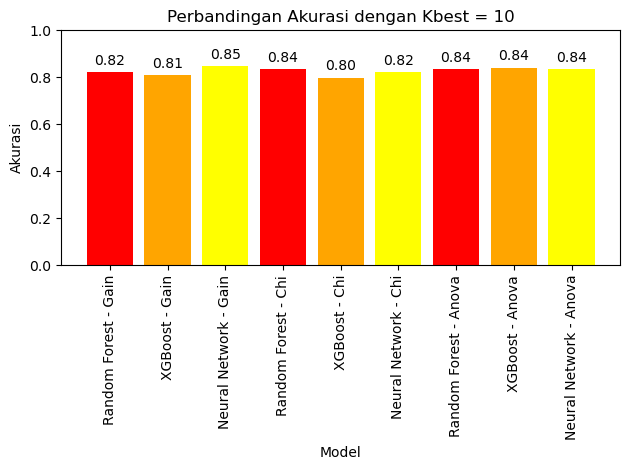

In [ ]:
model_names_kbest = list(compare_result_kbest.keys())
accuracies_kbest = list(compare_result_kbest.values())

fig, ax = plt.subplots()
colors = ['red', 'orange', 'yellow']
bars = ax.bar(model_names_kbest, accuracies_kbest, color=colors)
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi dengan Kbest = 10')

for bar, accuracy in zip(bars, accuracies_kbest):
    height = bar.get_height()
    ax.annotate(f'{accuracy:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                textcoords="offset points", ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=90)
plt.ylim(0.0, 1.0)
plt.tight_layout()
plt.show()

Membandingkan performa metode seleksi fitur yang telah dibuat di atas, didapatkan bahwa:

1. Dengan k=10, tren performa menurun namun tidak signifikan.

2. Performa metode Anova paling stabil.

3. Model neural network dikombinasikan dengan Information gain mendapatkan hasil paling baik.

In [ ]:
rf_result = np.std([compare_result_kbest['Random Forest - Gain'], compare_result_kbest['Random Forest - Chi'], compare_result_kbest['Random Forest - Anova']])
xgb_result = np.std([compare_result_kbest['XGBoost - Gain'], compare_result_kbest['XGBoost - Chi'], compare_result_kbest['XGBoost - Anova']])
nn_result = np.std([compare_result_kbest['Neural Network - Gain'], compare_result_kbest['Neural Network - Chi'], compare_result_kbest['Neural Network - Anova']])

gain_result = np.std([compare_result_kbest['Random Forest - Gain'], compare_result_kbest['XGBoost - Gain'], compare_result_kbest['Neural Network - Gain']])
chi_result = np.std([compare_result_kbest['Random Forest - Chi'], compare_result_kbest['XGBoost - Chi'], compare_result_kbest['Neural Network - Chi']])
anova_result = np.std([compare_result_kbest['Random Forest - Anova'], compare_result_kbest['XGBoost - Anova'], compare_result_kbest['Neural Network - Anova']])

### Model & Kbest Paling Stabil

C:\Users\Teguh\AppData\Local\Temp\ipykernel_24852\3424262549.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(model_names_stable, rotation=30)


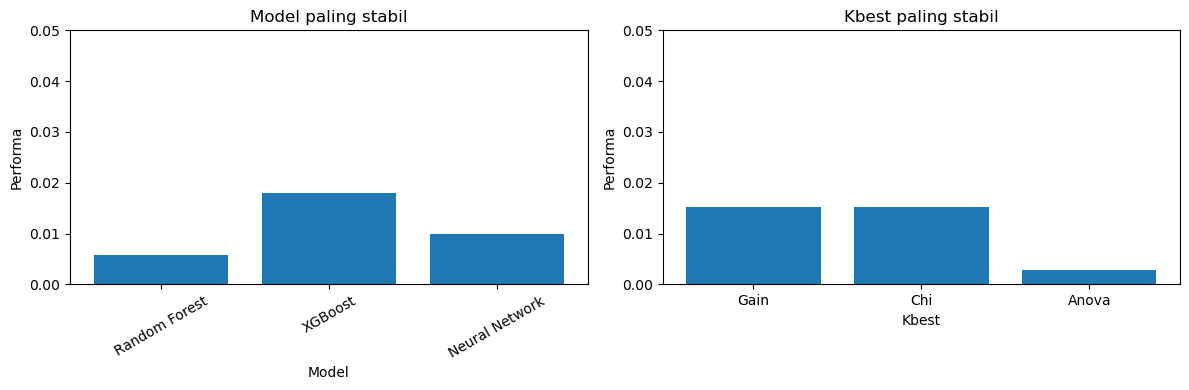

In [ ]:
model_names_stable = ['Random Forest', 'XGBoost', 'Neural Network']
accuracies_stable = [rf_result, xgb_result, nn_result]
kbest_names_stable = ['Gain', 'Chi', 'Anova']
kbest_accuracies_stable = [gain_result, chi_result, anova_result]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.bar(model_names_stable, accuracies_stable)
ax1.set_xlabel('Model')
ax1.set_ylabel('Performa')
ax1.set_title('Model paling stabil')
ax1.set_ylim(0, 0.05)
ax1.set_xticklabels(model_names_stable, rotation=30)


ax2.bar(kbest_names_stable, kbest_accuracies_stable)
ax2.set_xlabel('Kbest')
ax2.set_ylabel('Performa')
ax2.set_title('Kbest paling stabil')
ax2.set_ylim(0, 0.05)

plt.tight_layout()
plt.show()


Didapatkan bahwa:

1. Random Forest merupakan model paling stabil dan adaptif terhadap 3 metode seleksi fitur.

2. Anova menjadi metode seleksi fitur paling stabil dengan implementasinya ke tiga model berbeda, terbukti mendapatkan standar deviasi paling kecil.